In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage



def kill_isolpix(array,plot=False):
    """ Return array with isolated islands removed.
        Only keeping the biggest islands (largest surface).
    :param array: Array with completely isolated cells
    :param struct: Structure array for generating unique regions
    :return: Filtered array with just the largest island
    Nstruct vs threshold. Find a peak.
    """
    
    filtered_array = np.copy(array)
    
#    filtered_array[filtered_array < 0.2] = 0  #Rising the sea level if no zeor spaces btw islands
#    filtered_array[filtered_array < np.max(filtered_array)*0.1] = 0

    mask = filtered_array > 0

    label_im, nb_labels = ndimage.label(mask)#,structure=np.ones((5, 5)))

#    id_sizes = np.array(ndimage.sum(filtered_array, id_regions, range(num_ids + 1)))

#    sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))   
##    print(sizes)
#    mask_siz = sizes < np.max(sizes)
#    remove_pixel = mask_siz[label_im]


    sums = ndimage.sum(filtered_array, label_im, range( nb_labels + 1))
    mask_sum = sums < np.max(sums)
    remove_pixel = mask_sum[label_im]
#    print(sums)


    filtered_array[remove_pixel] = 0

#    if erod : filtered_array=ndimage.grey_erosion(filtered_array, size=(2,2))
    
    if plot :
        fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(10,5))

        ax[0].imshow(np.sqrt(array))
        ax[0].set_title('input image')

        ax[1].imshow(label_im)
        ax[1].set_title('connected regions labels')

        ax[2].imshow(np.sqrt(filtered_array)  )
        ax[2].set_title('cleaned output')

        for i,a in enumerate(ax): a.set_axis_off()
        plt.show()

    return filtered_array

In [36]:
#Generating fake image
n = 10
l = 50
size=5
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im[l/2-size:l/2+size,l/2-size:l/2+size]=1
#im = ndimage.filters.gaussian_filter(im, sigma=2)

/Users/facero/Documents/Work/Program/Anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


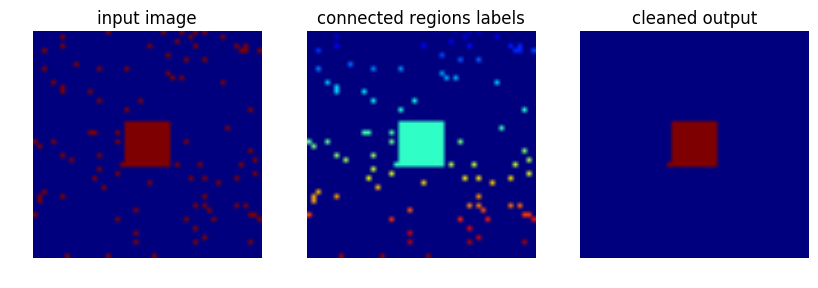

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
kill_isolpix(im,plot=True)